# Social Ads Forecasting Using Linear Regression

---

**Columns**

---


segment: market (ID form)

google, facebook, instagram: amount spent on the platforms in thousands (USD/$)

sales: units sold in thousands

size: market size

area: type of market

---

**Business Question**

---

Given a budget of $100k, how will you spend the budget to maximize revenue

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Obtaining the Data

In [3]:
df = pd.read_excel('social-ads-raw.xlsx')

In [4]:
df.head(10)

,segment,google,facebook,instagram,sales,size,area
0,1,230.1,37.8,69.2,22.1,large,rural
1,2,44.5,39.3,45.1,10.4,small,urban
2,3,17.2,45.9,69.3,9.3,small,rural
3,4,151.5,41.3,58.5,18.5,small,urban
4,5,180.8,10.8,58.4,12.9,large,suburban
5,6,8.7,48.9,75.0,7.2,large,suburban
6,7,57.5,32.8,23.5,11.8,large,suburban
7,8,120.2,19.6,11.6,13.2,large,urban
8,9,8.6,2.1,1.0,4.8,large,rural
9,10,199.8,2.6,21.2,10.6,large,suburban


## Scrubbing the Data

In [5]:
# Checking for unique items

print('Unique items in size column:', df['size'].unique())
print('Unique items in area column:', df['area'].unique())

Unique items in size column: ['large' 'small']
Unique items in area column: ['rural' 'urban' 'suburban']


In [6]:
# Creating new column and converting 'size' to binary

df['is_large'] = df['size'].map({'small':0, 'large': 1})
df['is_large'].unique()

array([1, 0], dtype=int64)

In [7]:
# Converting 'area' to binary columns

area_dummies = pd.get_dummies(df['area'])
df = df.join(area_dummies)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   segment    200 non-null    int64  
 1   google     200 non-null    float64
 2   facebook   200 non-null    float64
 3   instagram  200 non-null    float64
 4   sales      200 non-null    float64
 5   size       200 non-null    object 
 6   area       200 non-null    object 
 7   is_large   200 non-null    int64  
 8   rural      200 non-null    uint8  
 9   suburban   200 non-null    uint8  
 10  urban      200 non-null    uint8  
dtypes: float64(4), int64(2), object(2), uint8(3)
memory usage: 13.2+ KB


In [9]:
df.sample(5)

,segment,google,facebook,instagram,sales,size,area,is_large,rural,suburban,urban
13,14,97.5,7.6,7.2,9.7,small,urban,0,0,0,1
113,114,209.6,20.6,10.7,15.9,small,urban,0,0,0,1
29,30,70.6,16.0,40.8,10.5,small,urban,0,0,0,1
107,108,90.4,0.3,23.2,8.7,large,urban,1,0,0,1
135,136,48.3,47.0,8.5,11.6,small,suburban,0,0,1,0


## Exploring the Data

In [10]:
df.describe()

,segment,google,facebook,instagram,sales,is_large,rural,suburban,urban
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500,0.540000,0.295000,0.390000,0.315000
std,57.879185,85.854236,14.846809,21.778621,5.217457,0.499648,0.457187,0.488974,0.465682
min,1.000000,0.700000,0.000000,0.300000,1.600000,0.000000,0.000000,0.000000,0.000000
25%,50.750000,74.375000,9.975000,12.750000,10.375000,0.000000,0.000000,0.000000,0.000000
50%,100.500000,149.750000,22.900000,25.750000,12.900000,1.000000,0.000000,0.000000,0.000000
75%,150.250000,218.825000,36.525000,45.100000,17.400000,1.000000,1.000000,1.000000,1.000000
max,200.000000,296.400000,49.600000,114.000000,27.000000,1.000000,1.000000,1.000000,1.000000


Looking at the mean values, it seems like a large amount of budget is allocated to Google compared to Facebook and Instagram

### Relationship between sales and categorical features

<AxesSubplot:xlabel='area', ylabel='sales'>

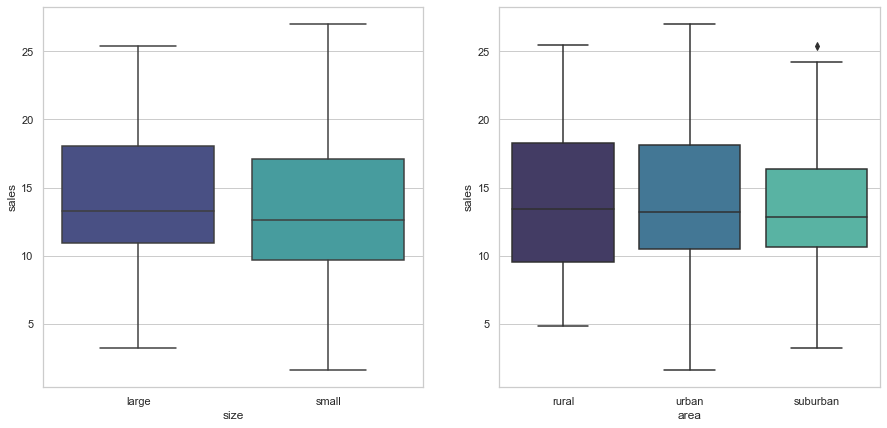

In [11]:
# Categorical features = size, area

sns.set(style='whitegrid')
main, sub = plt.subplots(1,2, figsize=(15,7))
sns.boxplot(data=df, x='size', y='sales', palette='mako', ax=sub[0])
sns.boxplot(data=df, x='area', y='sales', palette='mako', ax=sub[1])

For both features the median sales is about equal. It looks like there is not much influence between market size and area with sales.

<AxesSubplot:xlabel='area', ylabel='sales'>

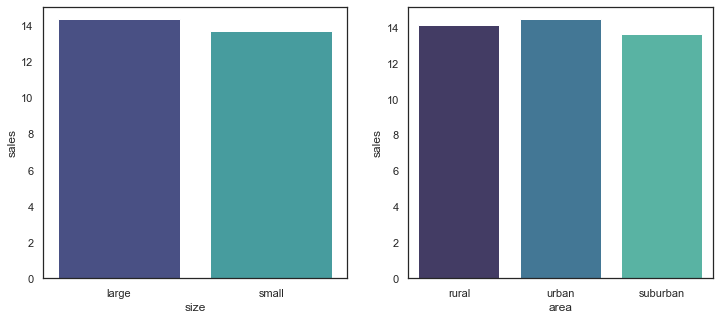

In [12]:
sns.set(style='white')
main, sub = plt.subplots(1,2, figsize=(12,5))
sns.barplot(data=df, x='size', y='sales', palette='mako', ci=None, ax=sub[0])
sns.barplot(data=df, x='area', y='sales', palette='mako', ci=None, ax=sub[1])

Sales different of about ~1k units or $5 million. The company can get higher sales if focused on large market size and in urban areas.

## Relationship between sales and continuous features

### Regression Plot

<AxesSubplot:xlabel='instagram', ylabel='sales'>

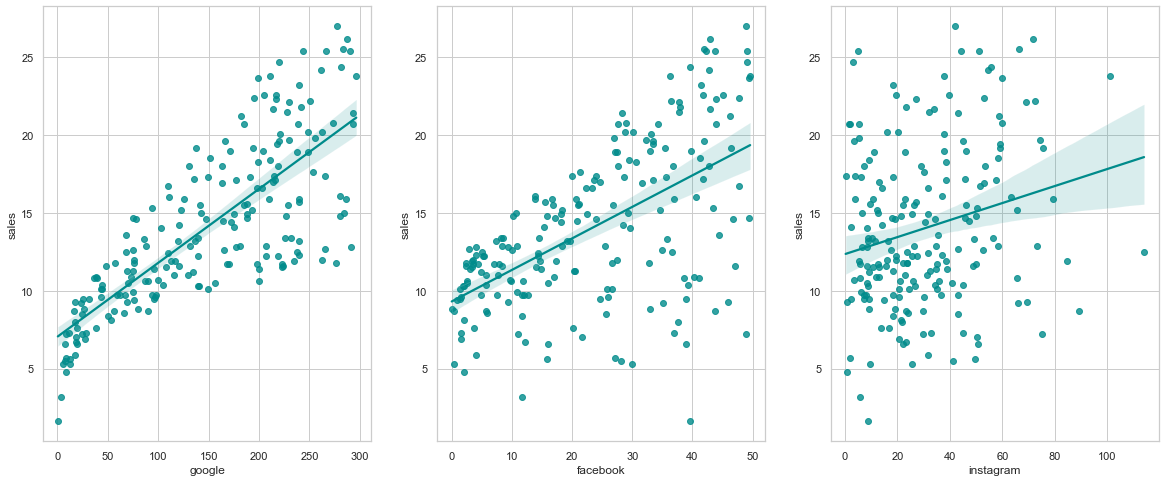

In [13]:
sns.set(style='whitegrid')
main, sub = plt.subplots(1,3, figsize=(20,8))
sns.regplot(data=df, x='google', y='sales', color='darkcyan', ax=sub[0])
sns.regplot(data=df, x='facebook', y='sales', color='darkcyan', ax=sub[1])
sns.regplot(data=df, x='instagram', y='sales', color='darkcyan', ax=sub[2])

As seen from the plots, the trend or slope for Google is higher (high predictability) and can be seen more clearly compared to Facebook and Instagram where they are more scattered and random. 

### Correlations between features

In [15]:
corr = df.corr()
corr

,segment,google,facebook,instagram,sales,is_large,rural,suburban,urban
segment,1.000000,0.017715,-0.110680,-0.154944,-0.051616,-0.110514,-0.035417,0.006747,0.027686
google,0.017715,1.000000,0.054809,0.056648,0.782224,0.131097,0.028420,-0.004299,-0.023388
facebook,-0.110680,0.054809,1.000000,0.354104,0.576223,-0.078994,-0.006793,-0.068522,0.078618
instagram,-0.154944,0.056648,0.354104,1.000000,0.228299,0.016979,0.037001,-0.046722,0.012733
sales,-0.051616,0.782224,0.576223,0.228299,1.000000,0.061626,0.013425,-0.062942,0.052911
is_large,-0.110514,0.131097,-0.078994,0.016979,0.061626,1.000000,0.157068,-0.043605,-0.108417
rural,-0.035417,0.028420,-0.006793,0.037001,0.013425,0.157068,1.000000,-0.517230,-0.438658
suburban,0.006747,-0.004299,-0.068522,-0.046722,-0.062942,-0.043605,-0.517230,1.000000,-0.542222
urban,0.027686,-0.023388,0.078618,0.012733,0.052911,-0.108417,-0.438658,-0.542222,1.000000


<AxesSubplot:>

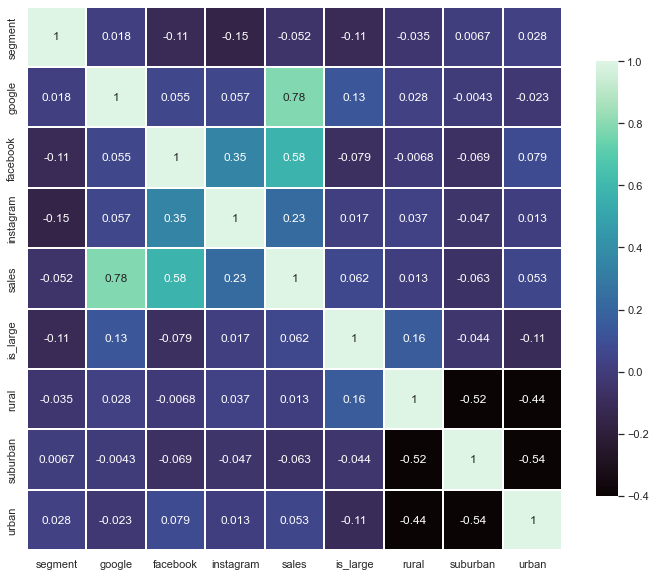

In [16]:
# Correlation Matrix

sns.set(rc={'figure.figsize':(12,10)})
#cmap = sns.diverging_palette(240, 10, n=9)
sns.heatmap(corr, cmap='mako', linewidths=0.1, cbar_kws={"shrink":.8}, annot=True, vmax=1,vmin=-.4)

Text(0.5, 1.0, 'Correlations with Sales')

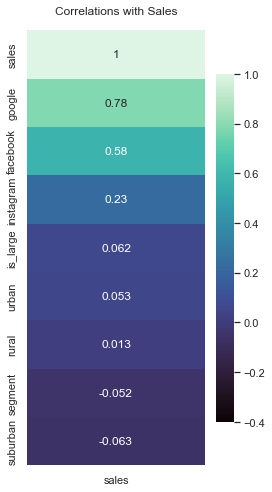

In [17]:
# Correlations with Sales

sns.set(rc={'figure.figsize':(4,8)})
heatmap = sns.heatmap(df.corr()[['sales']].sort_values(by='sales', ascending=False), annot=True, cmap='mako', vmax=1, vmin=-.4, cbar_kws={"shrink":.8})
heatmap.set_title('Correlations with Sales', fontdict={'fontsize':12}, pad=16)

We can see here that Google has the highest correlation with sales followed by Facebook and Instagram, proving the trend shown in the regression plots before.

Market size and area has very low correlations with sales.

## Modelling the Data

In [18]:
columns = ['google', 'facebook', 'instagram', 'is_large', 'rural', 'suburban', 'urban']

X = df[columns] # x (other variables/features)
y = df['sales'] # y (target variable)

model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [19]:
score = model.score(X,y)
c = model.intercept_
m = model.coef_

print('R-square Score:', score)
print('Intercept:', c)
print('Coefficients:', m)

R-square Score: 0.8981611875394304
Intercept: 2.928049332918782
Coefficients: [ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.05385834 -0.16042133
  0.21427968]


In [20]:
coef_data = zip(columns,m)

for col, val in coef_data:
  print(f'Coefficient for {col}: {val}')

Coefficient for google: 0.04574401036331377
Coefficient for facebook: 0.1878666955252582
Coefficient for instagram: -0.0010876977267109955
Coefficient for is_large: 0.07739660749747974
Coefficient for rural: -0.0538583438308713
Coefficient for suburban: -0.16042133399045805
Coefficient for urban: 0.21427967782132934


In [21]:
list_of_coef = list(zip(columns[:3],m[:3]))
#print(list_of_coef) 

coef_df = pd.DataFrame(list_of_coef, columns = ['Features', 'Coefficients']).sort_values(['Coefficients'], ascending=False)
coef_df

,Features,Coefficients
1,facebook,0.187867
0,google,0.045744
2,instagram,-0.001088


In [22]:
list_of_coef2 = list(zip(columns[4:],m[4:]))
#print(list_of_coef) 

coef_df2 = pd.DataFrame(list_of_coef2, columns = ['Features', 'Coefficients']).sort_values(['Coefficients'], ascending=False)
coef_df2

,Features,Coefficients
2,urban,0.214280
0,rural,-0.053858
1,suburban,-0.160421


Among the 3 ads platforms, Facebook has the highest coefficient followed by Google and Instagram. This will help to determine the ratio for our budget allocation (highest to lowest) - higher coefficients would mean higher revenue (no. of units sold for every $1 spent)

Among the 3 areas, urban has the highest coefficient so we will be focusing on urban and large market.

### Scenario 1

In [23]:
pred_sales1 = [10, 80, 10, 1, 0, 0, 1]
print(f'Predicted units sold: {model.predict([pred_sales1])[0]:.2f} units')

unit_price = 5000

revenue1 = model.predict([pred_sales1])[0] * 1000 * unit_price
print(f'Revenue: $ {revenue1:,.2f}')

Predicted units sold: 18.70 units
Revenue: $ 93,478,121.93


### Scenario 2

In [24]:
pred_sales2 = [20, 70, 10, 1, 0, 0, 1]
print(f'Predicted units sold: {model.predict([pred_sales2])[0]:.2f} units')

unit_price = 5000

revenue2 = model.predict([pred_sales2])[0] * 1000 * unit_price
print(f'Revenue: $ {revenue2:,.2f}')

Predicted units sold: 17.27 units
Revenue: $ 86,371,987.68


### Scenario 3

In [25]:
pred_sales3 = [30, 60, 10, 1, 0, 0, 1]
print(f'Predicted units sold: {model.predict([pred_sales3])[0]:.2f} units')

unit_price = 5000

revenue3 = model.predict([pred_sales3])[0] * 1000 * unit_price
print(f'Revenue: $ {revenue3:,.2f}')

Predicted units sold: 15.85 units
Revenue: $ 79,265,853.42


### Scenario 4

In [27]:
pred_sales4 = [20, 75, 5, 1, 0, 0, 1]
print(f'Predicted units sold: {model.predict([pred_sales4])[0]:.2f} units')

unit_price = 5000

revenue4 = model.predict([pred_sales4])[0] * 1000 * unit_price
print(f'Revenue: $ {revenue4:,.2f}')

Predicted units sold: 18.22 units
Revenue: $ 91,095,847.51


### Scenario 5

In [28]:
pred_sales5 = [30, 50, 20, 1, 0, 0, 1]
print(f'Predicted units sold: {model.predict([pred_sales5])[0]:.2f} units')

unit_price = 5000

revenue5 = model.predict([pred_sales5])[0] * 1000 * unit_price
print(f'Revenue: $ {revenue5:,.2f}')

Predicted units sold: 13.96 units
Revenue: $ 69,818,133.75


## Interpretation

In [29]:
pd.options.display.float_format = '{:,.2f}'.format

revenue_df = pd.DataFrame(zip(pred_sales1, pred_sales2, pred_sales3, pred_sales4, pred_sales5)).T
revenue_df.columns = columns
revenue_df['revenue'] = [revenue1, revenue2, revenue3, revenue4, revenue5]
revenue_df.rename(index={0: 'Scenario 1',
                         1: 'Scenario 2',
                         2: 'Scenario 3',
                         3: 'Scenario 4',
                         4: 'Scenario 5'}, inplace=True)

highlight = lambda x: ['background: lightgreen' if x.name in [2] # tried to highlight row but not working
                       else '' for i in x]

revenue_df.style.apply(highlight, axis=1)

,google,facebook,instagram,is_large,rural,suburban,urban,revenue
Scenario 1,10,80,10,1,0,0,1,93478121.933121
Scenario 2,20,70,10,1,0,0,1,86371987.675024
Scenario 3,30,60,10,1,0,0,1,79265853.416927
Scenario 4,20,75,5,1,0,0,1,91095847.506323
Scenario 5,30,50,20,1,0,0,1,69818133.754328


It is obvious that the more budget is allocated to Facebook ads, the more sales we will get. 

Google however has high predictability which means it is more consistent whereas Facebook and Instagram is more random. 

Due to Instagram's low coefficient, only 10% of the budget will be allocated. Facebook will have the highest budget allocation at 60% because it will generate more revenue and Google will be given 30% due to its consistency. 

Large market size is chosen and is focused on urban areas as it generates higher revenue as well.

Total revenue is predicted to be $ 79,265,853.42

## Testing using train_test_split

In [30]:
columns = ['google', 'facebook', 'instagram', 'is_large', 'rural', 'suburban', 'urban']

X = df[columns] # x (other variables/features)
y = df['sales'] # y (target variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [31]:
score = model.score(X_test, y_test)
c = model.intercept_
m = model.coef_

print('R-square Score:', score)
print('Intercept:', c)
print('Coefficients:', m)

R-square Score: 0.9307711843340338
Intercept: 2.928049332918782
Coefficients: [ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.05385834 -0.16042133
  0.21427968]


In [32]:
for col, val in zip(columns, m):
  print(f'Coefficient for {col}: {val}')

Coefficient for google: 0.04574401036331377
Coefficient for facebook: 0.1878666955252582
Coefficient for instagram: -0.0010876977267109955
Coefficient for is_large: 0.07739660749747974
Coefficient for rural: -0.0538583438308713
Coefficient for suburban: -0.16042133399045805
Coefficient for urban: 0.21427967782132934


In [33]:
# Budget = 100k

pred_sales = model.predict([[30, 60, 10, 1, 0, 0, 1]])
print(f'Predicted units sold: {pred_sales[0]:.2f} units')

unit_price = 5000

revenue = pred_sales[0] * 1000 * unit_price
print(f'Revenue: $ {revenue:,.2f}')

Predicted units sold: 15.85 units
Revenue: $ 79,265,853.42
